# Reading data

In [0]:
from attention import AttentionLayer

In [152]:
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet 
import nltk
import csv
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
import string
import pickle
import numpy as np
import pandas as pd 
import re
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
import nltk
nltk.download("stopwords")
!pip install rouge

#from natsort import natsorted

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data=pd.read_csv("/content/gdrive/My Drive/IR_PROJECT/Reviews.csv",nrows=10000)

In [0]:
data.drop_duplicates(subset=['Text'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

## Preprocessing of the dataset

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [0]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [0]:
#call the function

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [159]:
cleaned_text[:5]  

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [0]:
#call the function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [161]:
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [0]:
data['cleaned_text']=cleaned_text  #cleaned text is stored in the old_dataframe 
data['cleaned_summary']=cleaned_summary #----

In [0]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

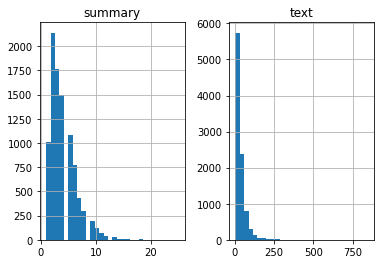

In [164]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [165]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=8):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9465544450289322


In [0]:
max_text_len=30
max_summary_len=8

In [0]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [0]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [0]:
# x_tr = np.array(df['text'])
# y_tr = np.array(df['summary'])

In [0]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [172]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 68.39143730886849
Total Coverage of rare words: 9.150849382372709


In [0]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [174]:
x_voc

2585

In [0]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [176]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 84.49258836944128
Total Coverage of rare words: 14.563302087943034


In [0]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [178]:
y_tokenizer.word_counts['sostok'],len(y_tr)   

(4772, 4772)

In [0]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [0]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [181]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 100)      258500      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 30, 300), (N 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [545]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs= 10,batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10
35/35 [==============================] - 85s 2s/step - loss: 0.5307 - val_loss: 2.3149
Epoch 2/10
35/35 [==============================] - 85s 2s/step - loss: 0.5193 - val_loss: 2.3398
Epoch 3/10
35/35 [==============================] - 85s 2s/step - loss: 0.4915 - val_loss: 2.3728
Epoch 4/10
35/35 [==============================] - 86s 2s/step - loss: 0.4737 - val_loss: 2.3835
Epoch 5/10
35/35 [==============================] - 85s 2s/step - loss: 0.4580 - val_loss: 2.4087
Epoch 6/10
35/35 [==============================] - 85s 2s/step - loss: 0.4414 - val_loss: 2.3930
Epoch 7/10
35/35 [==============================] - 84s 2s/step - loss: 0.4281 - val_loss: 2.4184
Epoch 8/10
35/35 [==============================] - 84s 2s/step - loss: 0.4116 - val_loss: 2.4341
Epoch 9/10
35/35 [==============================] - 84s 2s/step - loss: 0.4027 - val_loss: 2.4533
Epoch 10/10
35/35 [==============================] - 84s 2s/step - loss: 0.3780 - val_loss: 2.4918


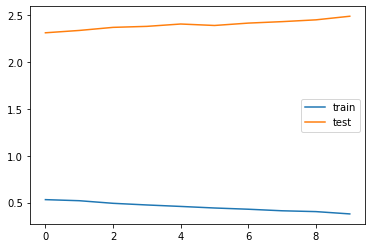

In [546]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [0]:
model.save("rnnlstm.h5")

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
# new_model = tf.keras.models.load_model('/content/rnnlstm.h5')
# # Check its architecture
# new_model.summary()

In [0]:
# from keras.models import load_model
# # Assuming your model includes instance of an "AttentionLayer" class
# model = load_model('/content/rnnlstm.h5', custom_objects={'AttentionLayer': AttentionLayer})

In [0]:
# model.load_model("/content/rnnlstm.h5")

In [0]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

# 2. Aspect based

In [0]:
def helper():
#     datalaptop=pd.read_csv("Data/laptop_final_data.csv")
#     datalaptop=datalaptop.fillna("None")
#     datalaptop.product_id=datalaptop.product_id.astype(int)
#     datarestaurant = pd.read_csv("Data/Restaurants_Final_data.csv")
#     datarestaurant=datarestaurant.fillna("None")
#     datarestaurant.product_id=datarestaurant.product_id.astype(int)
    datafood = pd.read_csv("/content/Food1.csv")
#     print(datafood.head())
    datafood.product_id=datafood.product_id.astype(int)
    datafood=datafood.fillna("None")
    return datafood


In [0]:
# def helper():
#     datalaptop=pd.read_csv("Data/laptop_final_data.csv")
#     datalaptop=datalaptop.fillna("None")
#     datalaptop.product_id=datalaptop.product_id.astype(int)
#     datarestaurant = pd.read_csv("Data/Restaurants_Final_data.csv")
#     datarestaurant=datarestaurant.fillna("None")
#     datarestaurant.product_id=datarestaurant.product_id.astype(int)
#     return datalaptop,datarestaurant

In [0]:

def readFile(filename):
    data=pd.read_csv("Data/"+filename)
    data=data.fillna("None")
    data.product_id=data.product_id.astype(int)
    print("Length of data:",len(data))
    print("Data head:")
    return data
# print(data.head())

In [0]:
def productSelection(product):
    datafood=helper()
    if(product=='food'):
        #data=readFile('Restaurants_Final_data.csv')
        data = datafood
        #print("Length of data:",len(data))
        print("Data head:")
        print(data.head())
    return data

In [0]:
# def productSelection(product):
#     datalaptop,datarestaurant=helper()
#     if(product=='laptop'):
#         #data=readFile('laptop_final_data.csv')
#         data = datalaptop
#         #print("Length of data:",len(data))
#         #print("Data head:")
#     elif(product=='restaurant'):
#         #data=readFile('Restaurants_Final_data.csv')
#         data = datarestaurant
#         #print("Length of data:",len(data))
#         #print("Data head:")
#     return data

# Abbreviating

In [0]:
abb_dict={'A/D':'Analog-to-Digital',
'ACM':'Association for Computing Machinery',
'AI':'Artificial Intelligence',
'ALGOL':'Algorithic Language',
'ALU':'Arithmetic Logic Unit',
'AMD':'Advanced Micro Devices',
'APRANET':'Advanced Research Project Agency Network',
'ASCII':'American Standard Code for Information Interchange',
'BCD':'Binary Coded Decimal',
'BIOS':'Basic Input Output System',
'BPI':'Bytes Per Inch',
'CAD':'Computer Aided Design',
'CAE':'Computer Aided Engineering',
'CASE':'Computer Aided Software Engineering',
'CD':'Compact Disk',
'CDC':'Control Data Corporation',
'CD-R':'CD-Recordable',
'CD-ROM':'Compact Disk Read Only Memory',
'CD-RW':'CD Read/Write',
'CL':'Command Language',
'CLI':'Command Line Interface',
'COBOL':'Common Business Oriented',
'CODASYL':'Conference On Data Systems',
'CPU':'Central Processing Unit',
'CRT':'Cathode Ray Tube',
'D/A':'Digital-to-Analog',
'DAT':'Digital Audio Tape',
'DBMS':'Data Base Management System',
'DBS':'Demand Based Switching',
'DDL':'Data Definition Language',
'DDS':'Digital Data Storage',
'DEC':'Digital Equipment Corporation',
'DMA':'Direct Memory Access',
'DNA':'Digital Network Architecture',
'DPI':'Dots Per Inch',
'DRAM':'Dynamic RAM',
'DSN':'Distributed Systems Network',
'DTS':'Digital Theater System',
'DVD':'Digital Video/Versatile Disk',
'EBCDIC':'Extended Binary Coded Decimal Interchange Code',
'EDSAC':'Electronic Delay Storage Automatic Calculator',
'EDVAC':'Electronic Discrete Variable Automatic Calculator',
'EFM':'Eight-to-Fourteen Modulation',
'ENIAC':'Electronic Numerical Integrator And Calculator',
'EPG':'Electronic Programming Guide',
'EPIC':'Explicitly Parallel Instruction Computing',
'EPROM':'Erasable Programmable Read-Only Memory',
'FAT':'File Allocation Table',
'FDM':'Frequency Division Multiplexing',
'FEP':'Front End Processor',
'FLOPS':'Floating Point Operations Per Second',
'FM':'Frequency Modulation',
'FMS':'File Management System',
'FORTRAN':'FORmula TRANslation',
'FSK':'Frequency Shift Keying',
'FTP':'File Transfer Protocol',
'GB':'Giga Bytes',
'GFLOPS':'Giga FLOPS',
'GHz':'Giga Hertz',
'GNU':'Gnu Not Unix',
'GPRS':'General Packet Radio Service',
'GSM':'Global System for Mobile communication',
'GUI':'Graphical User Interface',
'HP':'Hewlett Packard',
'HSS':'Hierarchical Storage System',
'HTML':'HyperText Markup Language',
'HTTP':'HyperText Transport Protocol',
'IBM':'International Business Machine',
'IC':'Integrated Circuit',
'IDN':'Integrated Digital Networks',
'IP':'Internet Protocol',
'IrDA':'Infrared Data Association',
'ISDN':'Integrated Services Digital Network',
'ISP':'Internet Service Provider',
'JPEG':'Joint Photographic Experts Group',
'JRE':'Java Runtime Engine',
'JSP':'Java Server Pages',
'KB':'Kilo Bytes',
'KHz':'Kilo Hertz',
'LAN':'Local Area Network',
'LCD':'Liquid Crystal Display',
'LED':'Light Emitting Diode',
'LPM':'Line Per Minute',
'LSI':'Large Scael Integration',
'MAN':'Metropolitan Area Network',
'MAR':'Memory Address Register',
'MB':'Mega Bytes',
'MBR':'Memory Buffer Register',
'MHz':'Mega Hertz',
'MIDI':'Musical Instrument Digital Interface',
'MIPS':'Millions of Instructions Per Second',
'MNP':'Microcom Network Protocol',
'MPEG':'Moving Pictures Experts Group',
'MS-DOS':'MicroSoft Disk Operating System',
'MVT':'Multiprogramming with Variable Tasks',
'NIC':'Network Interface Card',
'NICNET':'National Informatics Center NETwork',
'NOS':'Network Operating System',
'OCR':'Optical Character Recognition',
'OMR':'Optical Mark Reader',
'OS':'Operating System',
'OSI':'Open System Interconnection',
'OSS':'Open Source Software',
'PAN':'Personal Area Network',
'PC':'Personal Computer',
'PDF':'Portable Document Format',
'PDL':'Program Design Language',
'PDP':'Program Data Processor',
'PIP':'Peripheral Interchange Program',
'PROM':'Programmable Read-Only Memory',
'QoS':'Quality of Service',
'RAM':'Random Access Memory',
'ROM':'Read Only Memory',
'SDLC':'Software Development Life Cycle',
'SEQUEL':'Structured English QUEry Language',
'SGML':'Syntax for Generalized Markup Language',
'SIMM':'Single In-line Memory Module',
'SNA':'Systems Network Architecture',
'SNOBOL':'StriNg Oriented and symBOlic Language',
'SQL':'Structured Query Language',
'SRAM':'Static RAM',
'SSI':'Small Scale Integration',
'TB':'Tera Bytes',
'TCP':'Transport Control Protocol',
'TDM':'Time Division Multiplexing',
'UDP':'User Datagram Protocol',
'ULSI':'Ultra Large Scale Integration',
'UPC':'Universal Product Code',
'URL':'Uniform Resource Locator',
'USB':'Universal Serial Bus',
'UTF':'Unicode Transformation Format',
'VAN':'Value Added Network',
'VCR':'Video Cassette Recorder',
'VDT':'Video Display Terminal',
'VGA':'Video Graphics Array',
'VOD':'Video-On-Demand',
'VoIP':'Voice over Internet Protocol',
'VSAT':'Very Small Aperture Terminal',
'WAN':'Wide Area Network',
'WAP':'Wireless Application Protocol',
'WiMAX':'Worldwide Interoperability for Microwave Access',
'WLAN':'Wireless Local Area Network',
'WLL':'Wireless Local Loop',
'WORM':'Write Once Read Many',
'WWW':'World Wide Web',
'XHTML':'eXtensible HyperText Markup Language',
'XML':'eXtensible Markup Language',
'X.400':'Electronic Mail Protocol',
'X.500':'Directory Server Protocol',
'O/S':'Operating System',
'27"':'Inch',
'WT':'Weight',
'OSX':'Operating System',
'OS X':'Operating System',
'OS.X':'Operating System',
'Win7':'Windows 7'}

In [0]:
def abbreviatedFunc(abb):
    if abb in abb_dict:
        return abb_dict[abb]
    else:
        return abb

In [0]:
def translator(user_string):
    user_string = user_string.split(" ")
    result = ""
    for _str in user_string:
        # Removing Special Characters.
        _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
        result+=abbreviatedFunc(_str.upper()).lower()+" "
    return result
    #print(' '.join(user_string))
def Replacefunc(review):
    reviewnewlist = []
    reviewlist=review.split(' ')
    for l in reviewlist:
        reviewnewlist.append(translator(l))
        
    return ' '.join(reviewnewlist)


In [0]:

def preProcess_aspect(aspect):
    aspect=whitespaceRemoval(aspect)
    abb_list = []
    sentences = []  
    for s in aspect.split():
        s = re.sub(r'[!,;\'\n\"#$»%&()*/:;<=>?@[\]^_`{|}~]','',s)
        s = re.sub(r'-',' ',s)
        sentences.append(s.lower())
    finalstring = ' '.join(sentences)
    return finalstring

In [0]:
def contractionFunc(review):
    contractions={
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "i'd": "I had / I would",
    "i'd've": "I would have",
    "i'll": "I shall / I will",
    "i'll've": "I shall have / I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    review=review.split(" ")
    temp=''
    for i in review:
        if i in contractions:
            temp+=contractions[i]+" "
        else:
            temp+=i+" "
    return temp

def puntuationsRemoval(document):
    table = str.maketrans('', '', string.punctuation)
    document = document.translate(table)
    return document

def readFile(filename):
    file = open(filename, 'r',encoding ="ascii", errors ="surrogateescape")
    document=file.read()
    file.close()
    return document

def remove_header_footer(final_string): 
    new_final_string = "" 
    tokens = final_string.split('\n\n') 
    for token in tokens[1:-1]: 
        new_final_string += token+" "
    return new_final_string 

def puntuationsRemoval(document):
    table = str.maketrans('', '',string.punctuation)
    document = document.translate(table)
    return document

def lowerCase(document):
    document=document.lower()
    return document

def tokenization(document):
    token_list=word_tokenize(document)
    return token_list

def removePunctuationsUsingIsAphha(tokens):
    token_list=[token for token in tokens if token.isalpha()]
    return token_list

def stopWordsRemoval(tokens):
    stop_words=set(stopwords.words('english'))
    token_list=[token for token in tokens if not token in stop_words]
    return token_list

def porterStemmer(tokens):
    ps=PorterStemmer()
    token_list=[ps.stem(token) for token in tokens]
    return token_list

def whitespaceRemoval(document):
    return document.strip()

def lowerCaseTokens(tokens):
    token_list=[token.lower() for token in tokens]
    return token_list

In [0]:

def datasetAbb(data):
    for i in range(0,len(data)):
        review = data['text'][i]
        review = Replacefunc(review)
        data['text'][i] = review 
        for j in range(1,14):
            aspect = 'Aspect '+str(j)
            aspect_review = data[aspect][i]
            if aspect_review != 'None':
                #print(type(aspect_review))
                #print(aspect_review)
                aspect_review = Replacefunc(aspect_review)
                aspect_review = preProcess_aspect(aspect_review)
                data[aspect][i] = aspect_review
    
    print(data.head())    
    return data

# User Input Processing

In [0]:
# def stemming(word):
#     from nltk.stem import PorterStemmer
#     ps = PorterStemmer()
#     return ps.stem(word)

# def aspectList(data):
#     aspect_vocablist = []
#     for i in range(1,14):
#         aspect = 'Aspect '+str(i)
#         for a in data[aspect]:
#             if a != 'None':
#                 aspect_vocablist.append(a)

#     aspect_vocablist = list(set(aspect_vocablist))
    
#     #print(aspect_vocablist)
    
#     stemmed_aspects_list = []
#     for aspect in aspect_vcablist:
#         templist = []
#         for i in aspect.split():
#             templist.append(stemming(i))
#         aspects_stemmed=' '.join(templist)
#         stemmed_aspects_list.append(aspects_stemmed)
    
#     return stemmed_aspects_list,aspect_vocablist

In [0]:
def stemming(word):
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    return ps.stem(word)

def aspectList(data):
    aspect_vocablist = []
    for i in range(1,4):
        aspect = 'Aspect '+str(i)
        for a in data[aspect]:
            if a != 'None':
                aspect_vocablist.append(a)

    aspect_vocablist = list(set(aspect_vocablist))
    
    print(aspect_vocablist)
    
    stemmed_aspects_list = []
    for aspect in aspect_vocablist:
        templist = []
        for i in aspect.split():
            templist.append(stemming(i))
        aspects_stemmed=' '.join(templist)
        stemmed_aspects_list.append(aspects_stemmed)
    
    return stemmed_aspects_list,aspect_vocablist


# Aspect List Generation

In [0]:
def apsectListGeneration(query,aspect_vocablist,stemmed_aspects_list):
    synonyms = [] 
    final_vocablist = []
    for q in query.split(): #synonyms of the aspect word like batteryy life
        for syn in wordnet.synsets(q):
            for l in syn.lemmas():
                synonyms.append(l.name())
        synonyms = list(set(synonyms)) 

    for q in query.split(): # excel ka vocab se match
        if q in aspect_vocablist:
            final_vocablist.append(q)

    if query in aspect_vocablist: # battery life.
        final_vocablist.append(query)



    for q in query.split():
        if q in stemmed_aspects_list:      #checking in the stemmed list for the query word
            if q not in final_vocablist:
                final_vocablist.append(query)



    for s in synonyms:
        if (s in aspect_vocablist) or (s in stemmed_aspects_list):
            if s not in final_vocablist:
                final_vocablist.append(s)

    final_vocablist = list(set(final_vocablist))
    return final_vocablist

In [0]:
def query_aspectCreation(query,data):
    stemmed_aspects_list,aspect_vocablist=aspectList(data)
    #print(stemmed_aspects_list)
    #print(aspect_vocablist)
    query=translator(query)
    query=preProcess_aspect(query)
    aspects=apsectListGeneration(query,aspect_vocablist,stemmed_aspects_list)
    print("The aspects:",aspects)
    return aspects



# Building Positional Inverted Index for all tokens 

In [0]:
#Prerocessing steps
def preProcessing(review):
    review=lowerCase(review)
    review=contractionFunc(review)
    review=whitespaceRemoval(review)
    review=puntuationsRemoval(review)
    review_tokens=tokenization(review)
    review_tokens=lowerCaseTokens(review_tokens)
    return review_tokens

In [0]:
def invertedIndex(review_tokens,review_id,index):#Building positional index
    for position,term in enumerate(review_tokens):
        if term in index:
            if(review_id in index[term][1]):
                index[term][1][review_id].append(position)
            else:
                index[term][1][review_id]=[position]
                index[term][0]+=1
        else:
            index[term]=[]
            index[term].append(1)
            index[term].append({})
            index[term][1][review_id]=[position]  
    return index

In [0]:
def invertedindexCreation(data):  
    index={} #positional index
    review_list={} #stores review and review_id
    for ind in data.index: 
        review=data['text'][ind]
        review_tokens=preProcessing(review) #prerocessing each review
        review_id=data['product_id'][ind]
        review_list[review_id]=review_tokens
        index = invertedIndex(review_tokens,review_id,index) #positional index creation
    print("Positional Inverted Index Formation")
    #print(index)
    return index,review_list

# Finding postion of aspect in review

In [0]:
def phraseQuery(phrase,index):#finds the position of the aspects position in the review
    temp1={}
    temp2={}
    if(not phrase[0] in index):
        print("Not found!!")
        return
    for document,positions in index[phrase[0]][1].items():
        temp1[document]=positions
    
    for counter in range(1,len(phrase)):
        word=phrase[counter]
        if(not word in index):
            print("Not Found!!")
            return
        for document,positions in index[word][1].items():
            if(document in temp1):
                for position in positions:
                    if(position-1 in temp1[document]):
                        if(document in temp2):
                            temp2[document].append(position)
                        else:
                            temp2[document]=[position]
        if(len(temp2)==0):
            print("Not Found!!")
            return
        temp1=temp2.copy()
        temp2={}
    return temp1

# Finding ngrams relevant to check polarity of the aspect

In [0]:
def posTagging(ngrams):
    grammar = ('''
                    AJ+AV: {(<RB>|<RBR>|<RBS>)(<JJ>|<JJS>|<JJR>)}
                    AJ:{(<JJ>|<JJS>|<JJR>)}
                ''')
    chunkParser = nltk.RegexpParser(grammar)
    tagged = nltk.pos_tag(ngrams)
    tree = chunkParser.parse(tagged)
#     print("The POS tree:")
#     print(tree)
    polar_candidates=[]            
    for elem in tree:
        if isinstance(elem, nltk.Tree):
            temp = ""
            for (text, tag) in elem:
                temp += text+" "
            polar_candidates.append(whitespaceRemoval(temp))
    return polar_candidates

In [0]:
def fullGrams(aspect_review,grams,aspect_pos,aspect):
    final_review=''
    if aspect_pos-grams<0:
        for i in aspect_review[0:aspect_pos]:
            final_review+=str(i)+" "
    else:
        for i in aspect_review[aspect_pos-grams:aspect_pos]:
            final_review+=str(i)+" "
    for i in aspect:
        final_review+=str(i)+" "
        
    aspect_pos=aspect_pos+len(aspect)-1
    if aspect_pos+grams>=len(aspect_review):
        for i in aspect_review[aspect_pos+1:len(aspect_review)]:
            final_review+=str(i)+" "
    else:
        ngrams=aspect_review[aspect_pos+1:aspect_pos+grams]
        for i in aspect_review[aspect_pos+1:aspect_pos+grams]:
            final_review+=str(i)+" "
    return final_review

In [0]:
def polarityCandidatesLeft(aspect_pos,aspect_review,grams):
    if aspect_pos-grams<0:
        ngrams=aspect_review[0:aspect_pos]
    else:
        ngrams=aspect_review[aspect_pos-grams:aspect_pos]
    #print("The ngrams left are:",ngrams)
    polar_candidates=[]
    if(len(ngrams)!=0):
        polar_candidates=posTagging(ngrams)
    return polar_candidates

In [0]:
def polarityCandidatesRight(aspect_pos,aspect_review,grams):
    if aspect_pos+grams>=len(aspect_review):
        ngrams=aspect_review[aspect_pos+1:len(aspect_review)]
    else:
        ngrams=aspect_review[aspect_pos+1:aspect_pos+grams]
    #print("The ngrams right are:",ngrams)
    polar_candidates=[]
    if(len(ngrams)!=0):
        polar_candidates=posTagging(ngrams)
    return polar_candidates

# Score calculation to club sentence to positive and negative

In [0]:
def sentiwordNetScore(word,POS):#referring sysnsetWordNet to get the polarity of word
    try:
        temp=word+"."+POS+"."+"01"
        word=swn.senti_synset(temp)
        return word.pos_score(),word.neg_score(),word.obj_score()
    except:
        return 0,0,0

In [0]:
def scoring(attribute):
    attribute=tokenization(attribute)

    if(len(attribute)==1):#Only adjective
        adjective=attribute[0]
        adjective_score=sentiwordNetScore(adjective,'a')
        #print("Adjective Score:",adjective_score)
        if(adjective_score[0]>=adjective_score[1]):
                return adjective_score[0],'positive'
        elif(adjective_score[0]<adjective_score[1]):
                return adjective_score[1],'negative'
    elif(len(attribute)==2):#Adjective+Adverb
        adverb=attribute[0]
        adjective=attribute[1]
        adverb_score=sentiwordNetScore(adverb,'r')
        adjective_score=sentiwordNetScore(adjective,'a')
        #print("Adjective Score attached to adverb:",adjective_score)
        #print("Adverb Score:",adverb_score)
        if(adverb_score[0]>=adverb_score[1]):  #affirmation
            if(adjective_score[0]>=adjective_score[1]):
                return adjective_score[0]+0.35*adverb_score[0],'positive'
            elif(adjective_score[0]<adjective_score[1]):
                return adjective_score[1]+0.35*adverb_score[0],'negative'
        elif(adverb_score[0]<adverb_score[1]): #negation
            if(adjective_score[0]>=adjective_score[1]):
                return adjective_score[0]-0.35*adverb_score[1],'positive'
            elif(adjective_score[0]<adjective_score[1]):
                return adjective_score[1]-0.35*adverb_score[1],'negative'

In [0]:
def polarityScore(values):
    score=[0,0]
    for value in values[0]:
        total_score,type_of_score=scoring(value)
        if(type_of_score=='positive'):
            score[0]+=total_score
        elif(type_of_score=='negative'):
            score[1]+=total_score       
    for value in values[1]:
        total_score,type_of_score=scoring(value)
        if(type_of_score=='positive'):
            score[0]+=total_score
        elif(type_of_score=='negative'):
            score[1]+=total_score 
    #print("pos:",score[0],"neg",score[1])
    if(score[0]>score[1]):
        return 'positive',score[0]-score[1]
    elif(score[0]<score[1]):
        #print("---------------------------------------------------------------------negative")
        return 'negative',score[1]-score[0]
    else:
        return 'neutral',0

In [0]:
def tokenToString(tokens):
    temp=""
    for i in tokens:
        temp+=str(i)+" "
    return whitespaceRemoval(temp)

In [0]:
def addToDict(polarity_chart,type_polarity,aspect,key):
    aspect=tokenToString(aspect)
    if(key in polarity_chart):
        temp=[]
        temp.append(aspect)
        temp.append(type_polarity)
        polarity_chart[key].append(temp)
    else:
        polarity_chart[key]=[]
        temp=[]
        temp.append(aspect)
        temp.append(type_polarity)
        polarity_chart[key].append(temp)
    return polarity_chart

# Measures for testing the model

In [0]:
def accuracy(polarity_chart,data):
    total=0
    FP=0
    FN=0
    TP=0
    TN=0
    for key,values in polarity_chart.items():
        ind=data.index[data['product_id'] == key].tolist()[0]
        for i in range(2,len(data.columns),2):
            if i<len(data.columns):
                review=data.iloc[ind,i]
                for value in values:
                    if(value[0]==review):
                        sign=data.iloc[ind,i+1]
                        if(value[1]==sign):
                            if(sign=='positive'):
                                TP+=1
                            else:
                                TN+=1
                        elif(value[1]!=sign):
                            if(sign=='positive'):
                                FN+=1
                            elif(sign=='negative'):
                                FP+=1
                            elif(sign=='neutral'):
                                TP+=1
                                TN+=1
    #print(TP,TN,FP,FN)                            
    precision=round(TP/(TP+FP),4)
    recall=round(TP/(TP+FN),4)
    accuracy=round((TP+TN)/(TP+FP+TN+FN),4)
    f_score=round((2*precision*recall)/(precision+recall),4)
    #print("Precison:",precision," Recall:",recall," F-score:",f_score," Accuracy:",accuracy)
    return f_score

In [0]:
def plot(X,Y):
    plt.plot(X, Y)
    plt.xlabel('Number of grams') 
    # naming the y axis 
    plt.ylabel('F1 score') 
    plt.title('Number of grams vs F1 score') 
    plt.show()

# Main

In [0]:
def cruxFunc(index,review_list,aspects,data):
    X=[]
    Y=[]
    positive_review=[]
    negative_review=[]
    for no_of_grams in range(9,10):
        polarity_chart={}
        positive_review=[]
        negative_review=[]
        for aspect in aspects:
            #print("The aspect is:",aspect)
            aspect=preProcessing(aspect) #preprocess the aspect
            result=phraseQuery(aspect,index)  #getting postion of aspect in the review e.g in "the battery life" pos is 2 .Position of Second last word in aspect
            if(result is not None):
                for key,values in result.items(): # result has review is and the position of aspect
                    document_polar_word=[] # stores opinion word for the aspect in a review
                    aspect_review=review_list[key]
                    for value in values:
                        pos_aspect=(value+1)-len(aspect)
                        #print("Position of aspect:",aspect," in review:",aspect_review," is:",pos_aspect)
                        polar_candidates=polarityCandidatesLeft(pos_aspect,aspect_review,no_of_grams)
                        document_polar_word.append(polar_candidates)
                        polar_candidates=polarityCandidatesRight(pos_aspect+len(aspect)-1,aspect_review,no_of_grams)
                        document_polar_word.append(polar_candidates)
    #                 print("Polar words for aspect ",aspect," in review ",key," is:",document_polar_word)
                    type_polarity,score=polarityScore(document_polar_word)#score for each polar term
                    polarity_chart=addToDict(polarity_chart,type_polarity,aspect,key)
        #             if(type_polarity==1):
        #                 print("polarity of review ",aspect_review," is:Postive")
        #             elif(type_polarity==-1):
        #                 print("polarity of review ",aspect_review," is:Negative")
                    for value in values:
                        pos_aspect=(value+1)-len(aspect)
                        if(type_polarity=='positive' or type_polarity=='neutral'):
                            temp=fullGrams(aspect_review,no_of_grams,pos_aspect,aspect)
                            if(len(temp)!=0):
                                positive_review.append(temp)
                        if(type_polarity=='negative' or type_polarity=='neutral'):
                            temp=fullGrams(aspect_review,no_of_grams,pos_aspect,aspect)
                            if(len(temp)!=0):
                                negative_review.append(temp)
#                 print("Positive Review for aspect",aspect)
#                 print(positive_review)
#                 print("Negative Review for aspect",aspect)
#                 print(negative_review)

            else:
                print("No Documents contaning the phrase")
        #X.append(no_of_grams)
        #Y.append(accuracy(polarity_chart,data))
    #print("The polarity Chart is:")
    #print(polarity_chart)
    #plot(X,Y)
#     print("positive review:",positive_review)
#     print("neagtive review:",negative_review)
    return positive_review,negative_review
    

# GUI

In [0]:
def list2string(reviews):
    result = ""
    for r in range(len(reviews)):
        result += str(r+1)+'. '+ reviews[r]+'\n'
    return result

In [0]:

def getting_text(t, aspect,actual_sum):
    global test_text
    global test_aspect
    global act_summary
    test_text = t
    test_aspect = aspect
    act_summary = actual_sum


In [0]:
def submitFunc(temp):
    product = items[1].value
    query = items[3].value # aspects
    positive_review,negative_review=main(product,query)
    combined_list_temp=positive_review+negative_review
    # temp=pd.read_csv("/content/Food_gt.csv")
    ## actual_sum=temp.loc[temp['Aspect'] == query]['Actual_Summary'][0]
    actual_sum=temp.loc[temp['Aspect'] ==query, 'Actual_Summary'].iloc[0]
    comb = ""
    for i in combined_list_temp:
        comb += i
    getting_text(comb, query, actual_sum)


def storeData(db,product):
    if product == 'laptop':
        dbfile = open('AbbreviatedDataLaptop', 'ab') 
    # source, destination 
        pickle.dump(db, dbfile)                      
        dbfile.close() 
    elif(product=='restaurant'):
        dbfile = open('AbbreviatedDataRestaurant', 'ab') 
        # source, destination 
        pickle.dump(db, dbfile)                      
        dbfile.close() 
        
    
def loadData(product):
    if product == 'laptop':
        dbfile = open('AbbreviatedDataLaptop', 'rb')      
        db = pickle.load(dbfile) 
    elif(product=='restaurant'):
        dbfile = open('AbbreviatedDataRestaurant', 'rb')      
        db = pickle.load(dbfile) 
    return db

def main(product,query):
    #print(product,query)
    data = productSelection(product)
    #data = datasetAbb(data)
    #storeData(data,product)
    #data=loadData(product)
    aspects=query_aspectCreation(query,data)
    index,review_list=invertedindexCreation(data)
    positive_review,negative_review=cruxFunc(index,review_list,aspects,data)
#     print("positive review:",positive_review)
#     print("neagtive review:",negative_review)

    items[5].value = list2string(positive_review)
    items[7].value = list2string(negative_review)
    return positive_review,negative_review

In [0]:
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 

In [0]:
def bleuEvaluation(actual_summary,model_summary): 
    
    import nltk

    hypothesis = model_summary.split()
    reference = actual_summary.split()
    #there may be several references
    score = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    print("1. Bleu Score:",score)
    print("   ")

In [0]:
def rougeEvaluation(actual_summary, model_summary):
    rouge = Rouge()
    scores = rouge.get_scores(actual_summary, model_summary)
    print("2. ROUGE score:",scores)
    print("   ")

In [0]:
def evalutionMetrics(actual,model):
    print("   ")
    print("--------------------------------------------------------------------------------------")
    print("Summaries")
    print("--------------------------------------------------------------------------------------")
    print("Actual summary is:")
    actual_summary=actual
#     for sen in actual:
#         if(sen[0].isalpha):
#             sen=sen.capitalize()
#         sen=whitespaceRemoval(sen)
#         actual_summary+=sen+" " 
    print(actual_summary)
    print("      ")
    print("Model Summary is:", model)
    model_summary=model
    # for sen in model:
        # if(sen[0].isalpha):
            # sen=sen.capitalize()
        # sen=whitespaceRemoval(sen)
        # model_summary+=sen+". " 
    # print(model_summary)
    print("--------------------------------------------------------------------------------------")
    print("Evalaution Metrics:")
    print("--------------------------------------------------------------------------------------")
    bleuEvaluation(actual_summary,model_summary) # 1.
    rougeEvaluation(actual_summary, model_summary) # 2.
    # precision = precisionEvalautionSentenceBasis(actual_summary, model_summary) # 3.
    # recall = recallEvalautionSentenceBasis(actual_summary, model_summary) # 4.
    # f1 = (2 * precision* recall)/(precision +recall)
    # print("5. F1-score on basis of common sentences:", f1)


In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [595]:
items = [widgets.Label(value='Select the product:'),widgets.Dropdown(
    options=['laptop', 'restaurant','food'],
    value='food',
    disabled=False,),widgets.Label(value='Enter aspect of the product: '),widgets.Text(),widgets.Label(value='Positive review: '),widgets.Textarea(),widgets.Label(value='Negative review: '),widgets.Textarea()]
left_box = widgets.VBox([items[0], items[2],items[4],items[6]])
right_box = widgets.VBox([items[1], items[3],items[5],items[7]])
widgets.HBox([left_box, right_box])

In [710]:

nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
temp_pd=pd.read_csv("/content/Food_gt.csv")

In [712]:
temp_pd.head()

Aspect       Actual_Summary
0     price      excellent price
1     taste     great good taste
2  delivery  fast great delivery
3     smell          awful smell

In [713]:
#button = items[5]
button =widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)
output = widgets.Output()
display(button,output)    #The submit button will print the output here!!
def on_button_clicked(b):
    with output:
        submitFunc(temp_pd)
button.on_click(on_button_clicked)

Button(description='Submit', style=ButtonStyle(), tooltip='Click me')

Output()

In [727]:
# text and summary
# text is for each aspect that is generated from our model
# summary is fetched
# get aspect # user input
print(test_text)
data_test = {'Aspect':test_aspect,'Summary' : act_summary, 'Text' : test_text}
data_test = pd.DataFrame(data_test, index=[0])
data_test

easy meal finding it on amazon for a decent price and having it delivered to your door by roughly 25 cents per cup which is half the price of my local grocery stores plus they rarely plus they rarely stock the spicy flavors hence the price was good these things are a great snack do not have to pay for the shipping the price on amazon is great but it is still to have a very nice snack great item great price too highly recommend a nice little kick to it at this awesome price it has it is a steal receive rave reviews from my guests definitely worth the price super cheap and super easy love it cinnamon coffee cake really takes the cake with size price quality and tastebr the cake arrived very fast will buy more but not at this whacked out price product arrived with 2 broken bottles which at this price is a 6 loss hence the price is at this price is a 6 loss hence the price is awfulthe bottles are glass and all they great taffy at a great price there was a wide assortment of yummy taffy for

Aspect  ...                                                                                                                                                                                                     Text
0  price  ...  easy meal finding it on amazon for a decent price and having it delivered to your door by roughly 25 cents per cup which is half the price of my local grocery stores plus they rarely plus they rar...

[1 rows x 3 columns]

In [0]:
#call the function

cleaned_text = []
for t in data_test['Text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [0]:
#call the function
cleaned_summary = []
for t in data_test['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [0]:
data_test['cleaned_text']=cleaned_text  #cleaned text is stored in the old_dataframe 
data_test['cleaned_summary']=cleaned_summary #----

In [0]:
x_test = data_test['cleaned_text']
x_test = np.array(x_test)

In [732]:
x_test

array(['easy meal finding amazon decent price delivered door roughly cents per cup half price local grocery stores plus rarely plus rarely stock spicy flavors hence price good things great snack pay shipping price amazon great still nice snack great item great price highly recommend nice little kick awesome price steal receive rave reviews guests definitely worth price super cheap super easy love cinnamon coffee cake really takes cake size price quality tastebr cake arrived fast buy whacked price product arrived broken bottles price loss hence price price loss hence price awfulthe bottles glass great taffy great price wide assortment yummy taffy garage door openerbr great deal price offer great price great taste thanks amazon selling better getting almost half price grocery health food store grocery health food store price awesome love mccanns instant oatmeal flavorsbr delivered door price slightly less price reasonable price slightly less price reasonable autoship like price good seen

In [733]:
summ = "sostok "+ data_test['cleaned_summary']+" eostok"
print(summ)
y_test = np.array(summ)

0    sostok excellent price eostok
Name: cleaned_summary, dtype: object


xval

In [0]:
#convert text sequences into integer sequences
x_test_seq   =   x_tokenizer.texts_to_sequences(x_test) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#padding zero upto maximum length
x_test   =   pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

In [0]:

#convert text sequences into integer sequences
y_test_seq   =   y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_test   =   pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

In [0]:
ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
x_test=np.delete(x_test,ind, axis=0)

In [737]:
print("Review:",seq2text(x_test[0]))
actual_sum = seq2summary(y_test[0])
print("Original summary:",actual_sum)
model_sum = decode_sequence(x_test[0].reshape(1,max_text_len))
print("Predicted summary:",model_sum)

Review: home unable get door great deal price offer great price great taste thanks amazon selling complaints price little ridiculous add great product way worst price seen whole foods carries item 
Original summary: excellent price 
Predicted summary:  excellent product


In [0]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge 

In [739]:
evalutionMetrics(actual_sum,model_sum)

   
--------------------------------------------------------------------------------------
Summaries
--------------------------------------------------------------------------------------
Actual summary is:
excellent price 
      
Model Summary is:  excellent product
--------------------------------------------------------------------------------------
Evalaution Metrics:
--------------------------------------------------------------------------------------
1. Bleu Score: 0.8408964152537145
   
2. ROUGE score: [{'rouge-1': {'f': 0.4999999950000001, 'p': 0.5, 'r': 0.5}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.4999999950000001, 'p': 0.5, 'r': 0.5}}]
   
